# COVID-19

This example uses the 'covid19' dataset to predict the number of deaths and cases one day in advance. You can download the Jupyter Notebook of the study <a href="covid19.ipynb">here</a>.

<ul class="ul_content">
    <li><b>date: </b>Date of the record</li>
    <li><b>cases: </b>Number of people infected</li>
    <li><b>deaths: </b>Number of deaths</li>
    <li><b>state: </b>State</li>
    <li><b>fips: </b>The Federal Information Processing Standards (FIPS) code for the county.</li>
    <li><b>county: </b>County</li>
</ul>

We will follow the data science cycle (Data Exploration - Data Preparation - Data Modeling - Model Evaluation - Model Deployment) to solve this problem.

## Initialization

This example uses the following version of VerticaPy:

In [1]:
import verticapy as vp

vp.__version__

'1.1.0-beta'

Connect to Vertica. This example uses an existing connection called "VerticaDSN." For details on how to create a connection, use see the <a href="../../connection.php">connection tutorial</a>.

In [2]:
vp.connect("VerticaDSN")

Connected Successfully!


Let's create a Virtual DataFrame of the dataset. The dataset is available <a href="../../data/covid19_deaths.csv">here</a>.

,📅dateDate,AbccountyVarchar(66),AbcstateVarchar(48),AbcfipsVarchar(100),123casesInteger,123deathsInteger
1,2020-01-25,Orange,California,6059,1,0
2,2020-01-29,Orange,California,6059,1,0
3,2020-01-29,Snohomish,Washington,53061,1,0
4,2020-01-30,Los Angeles,California,6037,1,0
5,2020-01-31,Los Angeles,California,6037,1,0
6,2020-01-31,Maricopa,Arizona,4013,1,0
7,2020-02-01,Cook,Illinois,17031,2,0
8,2020-02-01,Orange,California,6059,1,0
9,2020-02-02,Los Angeles,California,6037,1,0
10,2020-02-02,Snohomish,Washington,53061,1,0

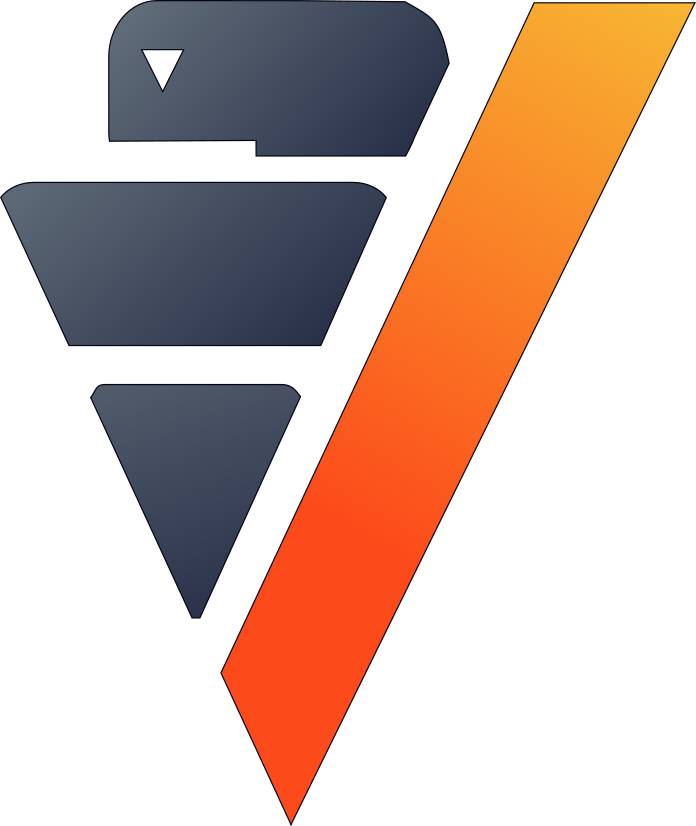

In [3]:
covid19 = vp.read_csv("deaths.csv")
covid19.head(10)

## Data Exploration and Preparation

Let's explore the data by displaying descriptive statistics of all the columns.

,dtype,count,top,top_percent,unique
"""date""",date,129747,2020-05-09,2.244,110.0
"""county""",varchar(66),129747,Washington,1.15,1713.0
"""state""",varchar(48),129747,Texas,6.633,55.0
"""fips""",varchar(100),129747,(null),1.149,2883.0
"""cases""",int,129747,1,13.303,3903.0
"""deaths""",int,129747,0,60.989,851.0

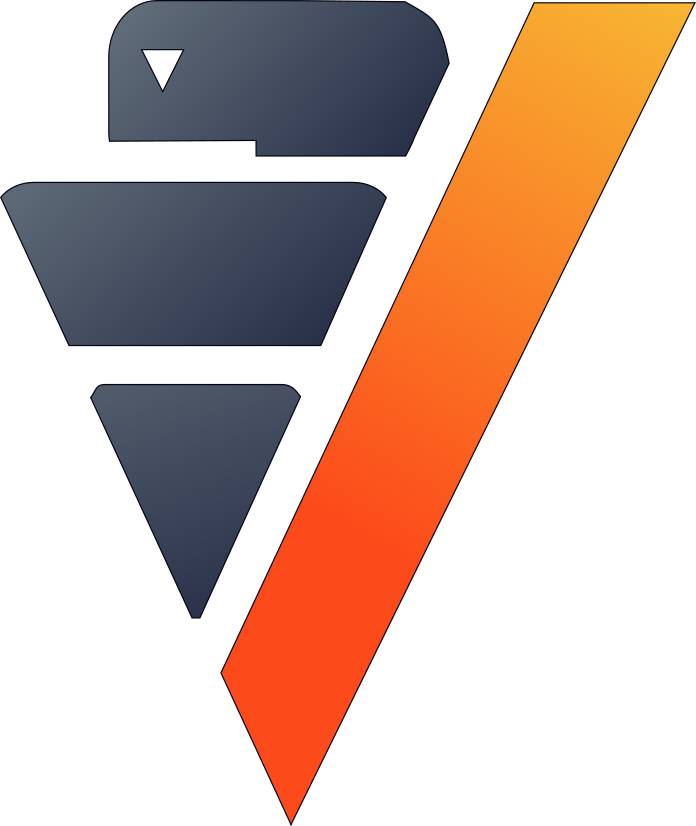

In [4]:
covid19.describe(method = "categorical", unique = True)

We have data from January 2020 to the beginning of May.

,value
name,"""date"""
dtype,date
count,129747
min,2020-01-21
max,2020-05-09

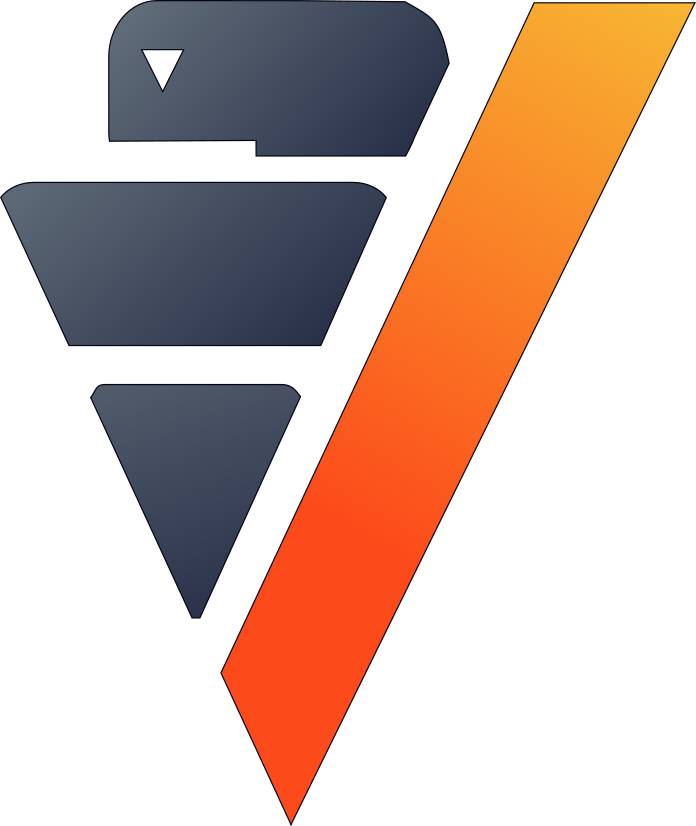

In [5]:
covid19["date"].describe()

We'll try to predict the number of future deaths by using the statistics from previous days. We can drop the columns 'county' and 'fips,' since the scope of our analysis is focused on the United States and the FIPS code isn't relevant to our predictions.

,📅dateDate,AbcstateVarchar(48),123casesInteger,123deathsInteger
1,2020-01-25,California,1,0
2,2020-01-29,California,1,0
3,2020-01-29,Washington,1,0
4,2020-01-30,California,1,0
5,2020-01-31,California,1,0
6,2020-01-31,Arizona,1,0
7,2020-02-01,Illinois,2,0
8,2020-02-01,California,1,0
9,2020-02-02,California,1,0
10,2020-02-02,Washington,1,0

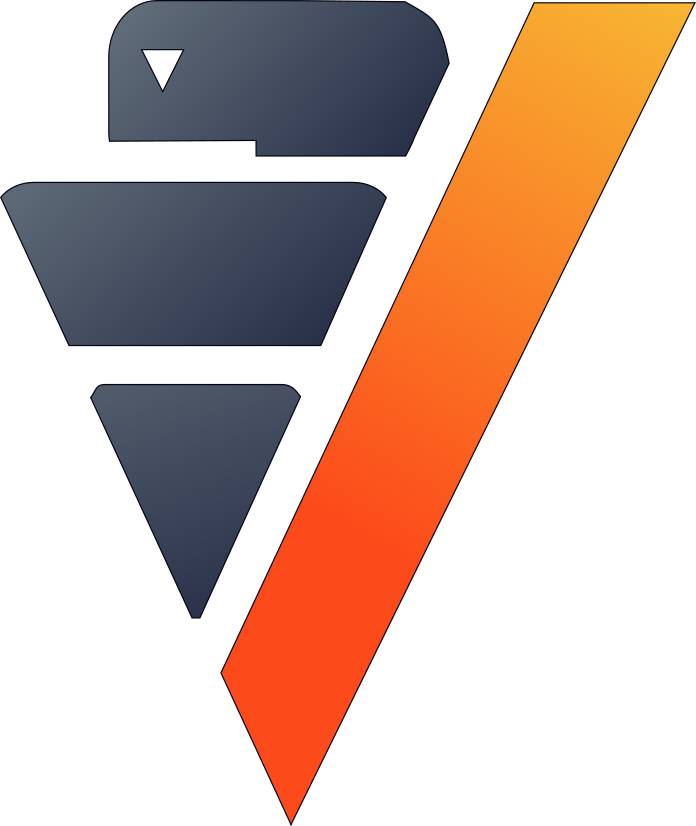

In [6]:
covid19.drop(["fips", "county"])

Let's sum the number of deaths and cases by state and date.

,AbcstateVarchar(48),📅dateDate,123deathsInteger,123casesInteger
1,Illinois,2020-04-23,1696,36934
2,Indiana,2020-03-27,26,986
3,New Mexico,2020-04-28,110,2975
4,Idaho,2020-03-18,0,11
5,Florida,2020-03-30,72,5696
6,Massachusetts,2020-04-28,3153,58302
7,South Dakota,2020-04-14,6,987
8,Vermont,2020-05-07,54,916
9,California,2020-01-30,0,2
10,Oregon,2020-04-02,21,827

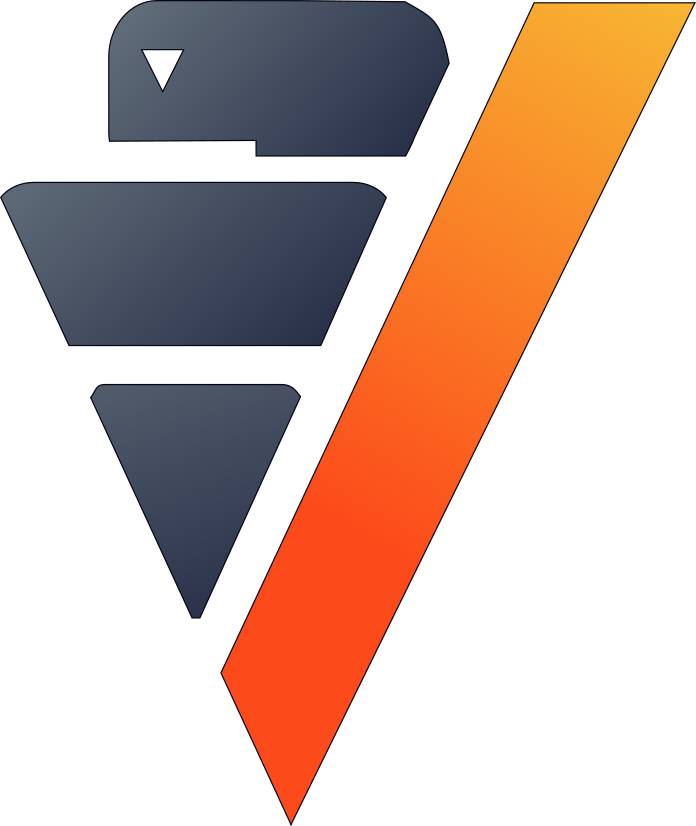

In [7]:
import verticapy.sql.functions as fun

covid19 = covid19.groupby(
    [
        "state",
        "date"
    ],
    [
        fun.sum(covid19["deaths"])._as("deaths"),
        fun.sum(covid19["cases"])._as("cases"),
    ]
)
covid19.head(10)

Let's look at the autocorrelation graphic of the number of deaths.

In [9]:
covid19.acf(
    column = "deaths", 
    ts = "date",
    by = ["state"],
    p = 24,
)

The process doesn't seem to be stationary. Let's use a Dickey-Fuller test to confirm our hypothesis.

,value
ADF Test Statistic,0.020308057561120422
p_value,0.98379896746093
# Lags used,12
# Observations Used,3754
Critical Value (1%),-3.43
Critical Value (2.5%),-3.12
Critical Value (5%),-2.86
Critical Value (10%),-2.57
Stationarity (alpha = 1%),❌

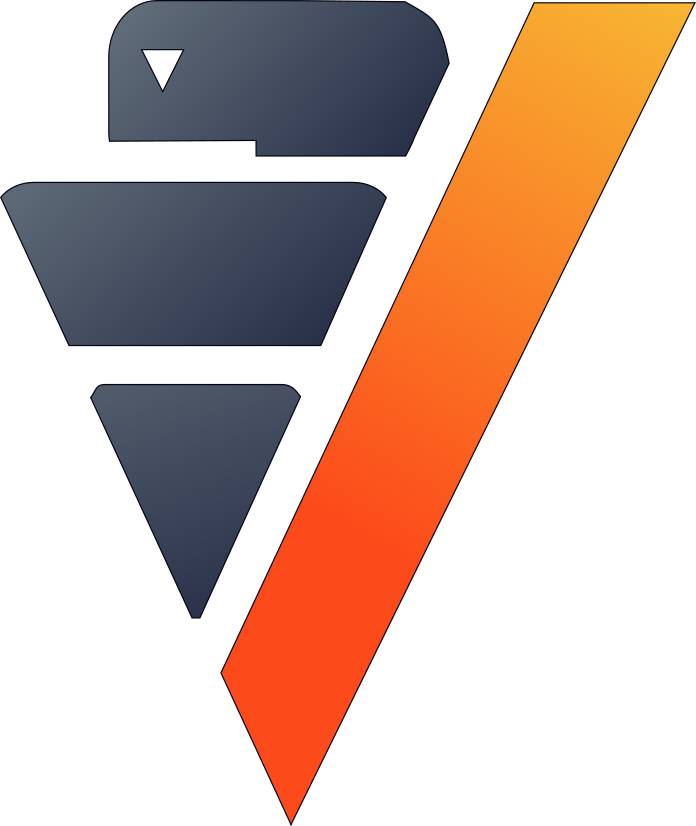

In [10]:
from verticapy.machine_learning.model_selection.statistical_tests import adfuller

adfuller(
    covid19,
    ts = "date", 
    column = "deaths", 
    by = ["state"], 
    p = 12,
)

We can look at the cumulative number of deaths and its exponentiality.

In [11]:
covid19["deaths"].plot(
    ts = "date", 
    by = "state",
)

Let's plot this for the entire country.

In [12]:
covid = covid19.groupby(
    ["date"],
    [fun.sum(covid19["deaths"])._as("deaths")],
)
covid["deaths"].plot(ts = "date")

As you would expect, there's a clear correlation between the number of people infected and the number of deaths.

In [13]:
covid19.corr(["deaths", "cases"])

0.980134457432841

A vector autoregression (VAR) model can be very good to do the predictions. But first, let's encode the states to look at their influence.

,AbcstateVarchar(48),📅dateDate,123deathsInteger,123casesInteger,123state_AlabamaInteger,123state_AlaskaInteger,123state_ArizonaInteger,123state_ArkansasInteger,123state_CaliforniaInteger,123state_ColoradoInteger,123state_ConnecticutInteger,123state_DelawareInteger,123state_District_of_ColumbiaInteger,123state_FloridaInteger,123state_GeorgiaInteger,123state_GuamInteger,123state_HawaiiInteger,123state_IdahoInteger,123state_IllinoisInteger,123state_IndianaInteger,123state_IowaInteger,123state_KansasInteger,123state_KentuckyInteger,123state_LouisianaInteger,123state_MaineInteger,...,123state_NevadaInteger,123state_New_HampshireInteger,123state_New_JerseyInteger,123state_New_MexicoInteger,123state_New_YorkInteger,123state_North_CarolinaInteger,123state_North_DakotaInteger,123state_Northern_Mariana_IslandsInteger,123state_OhioInteger,123state_OklahomaInteger,123state_OregonInteger,123state_PennsylvaniaInteger,123state_Puerto_RicoInteger,123state_Rhode_IslandInteger,123state_South_CarolinaInteger,123state_South_DakotaInteger,123state_TennesseeInteger,123state_TexasInteger,123state_UtahInteger,123state_VermontInteger,123state_Virgin_IslandsInteger,123state_VirginiaInteger,123state_WashingtonInteger,123state_West_VirginiaInteger,123state_WisconsinInteger
1,West Virginia,2020-04-10,5,537,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Hawaii,2020-05-08,17,619,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Idaho,2020-04-08,19,1232,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Florida,2020-04-20,822,27050,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Oklahoma,2020-03-29,16,429,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,South Dakota,2020-03-30,1,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,Washington,2020-05-07,903,17334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,California,2020-02-20,0,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Northern Mariana Islands,2020-05-09,2,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,Northern Mariana Islands,2020-04-03,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

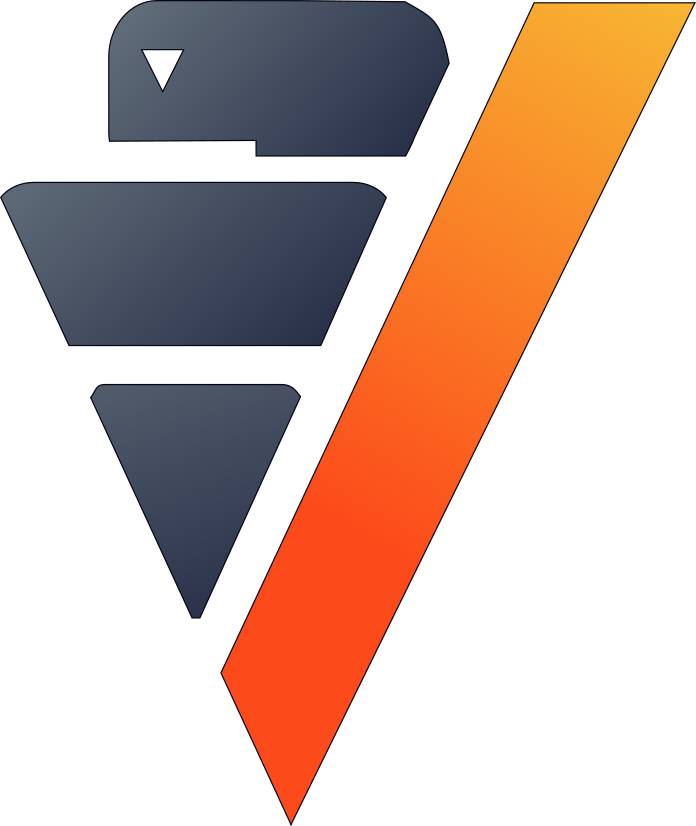

In [14]:
covid19["state"].one_hot_encode()

Because of the upward monotonic trend, we can also look at the correlation between the days elapsed and the number of cases.

In [15]:
covid19["elapsed_days"] = covid19["date"] - fun.min(covid19["date"])._over(by = [covid19["state"]])

We can generate the SQL code of the vDataFrame to see what happens behind the scenes when we modify our data from within the vDataFrame.

In [16]:
print(covid19.current_relation())

(
   SELECT
     "state",
     "date",
     "deaths",
     "cases",
     DECODE("state_Alabama", 'Alabama', 1, 0) AS "state_Alabama",
     DECODE("state_Alaska", 'Alaska', 1, 0) AS "state_Alaska",
     DECODE("state_Arizona", 'Arizona', 1, 0) AS "state_Arizona",
     DECODE("state_Arkansas", 'Arkansas', 1, 0) AS "state_Arkansas",
     DECODE("state_California", 'California', 1, 0) AS "state_California",
     DECODE("state_Colorado", 'Colorado', 1, 0) AS "state_Colorado",
     DECODE("state_Connecticut", 'Connecticut', 1, 0) AS "state_Connecticut",
     DECODE("state_Delaware", 'Delaware', 1, 0) AS "state_Delaware",
     DECODE("state_District_of_Columbia", 'District of Columbia', 1, 0) AS "state_District_of_Columbia",
     DECODE("state_Florida", 'Florida', 1, 0) AS "state_Florida",
     DECODE("state_Georgia", 'Georgia', 1, 0) AS "state_Georgia",
     DECODE("state_Guam", 'Guam', 1, 0) AS "state_Guam",
     DECODE("state_Hawaii", 'Hawaii', 1, 0) AS "state_Hawaii",
     DECODE("state_I

The vDataFrame memorizes all of our operations on the data to dynamically generate the correct SQL statement and passes computation and aggregation to Vertica.

Let's see the correlation between the number of deaths and the other variables.

In [17]:
covid19.corr(focus = "deaths")

We can see clearly a high correlation for some variables. We can use them to compute a SARIMAX model, but we'll stick to a VAR model for this study.

Let's compute the total number of deaths and cases to create our VAR model.

In [43]:
covid19 = vp.read_csv("deaths.csv").groupby(
    ["date"],
    [
        fun.sum(covid19["deaths"])._as("deaths"),
        fun.sum(covid19["cases"])._as("cases"),
    ],
).search("date > '04-01-2020'")

## Machine Learning

Let's create a VAR model to predict the number of COVID-19 deaths and cases in the USA.

,"""cases""","""deaths"""
r2,0.686208217269015,0.50498353928935

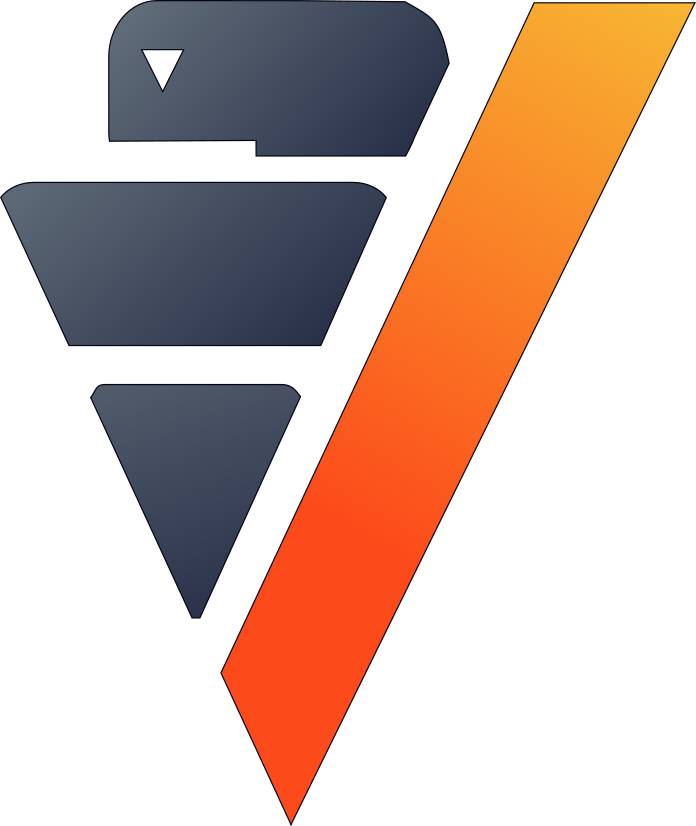

In [53]:
from verticapy.machine_learning.vertica.tsa import VAR

model = VAR(p = 3)
model.fit(
    covid19,
    ts = "date",
    y = ["cases", "deaths"],
    return_report = True,
)
model.score(start = 20)

Our model is not bad. Let's predict the number of deaths in a near future.

In [56]:
model.plot(
    covid19,
    start = 37,
    npredictions = 10,
    idx = 0,
)

In [57]:
model.plot(
    covid19,
    start = 37,
    npredictions = 10,
    idx = 1,
)

The model performs well but may be somewhat unstable. To improve it, we could apply data preparation techniques, such as seasonal decomposition, before building the VAR model.

## Conclusion

We've solved our problem in a Pandas-like way, all without ever loading data into memory!